# NBA MVP Machine Learning Project

Table of Contents:

1. Data Collection
2. Data Cleaning
3. Exploratory Data Analysis
4. Splitting Data
5. Regression
6. Random Forest

## 1. Data Collection

The data that is needed for this project is the MVP winners from 2022 to 1980, the individual player stats for all of these years and the team stats as well.

Link 1:https://www.basketball-reference.com/awards/awards_2020.html

- The MVP rankings. Change each year in the url to get all the years up until 1980

Link 2: https://www.basketball-reference.com/leagues/NBA_2022_per_game.html

- The regular season player stats. Change each year in the url to get all the years up until 1980

Link 3: https://www.basketball-reference.com/leagues/NBA_2022.html

- The team stats for the season. Change each year in the url to get all the years up until 1980

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

### 1.1 Link 1: MVP Data

In [2]:
# website to be scraped
url = 'https://www.basketball-reference.com/awards/awards_2022.html'
website = requests.get(url).text
soup = BeautifulSoup(website, 'lxml')

In [3]:
# MVP table class
mvp_table = soup.find(id="mvp")

# use pandas to read the whole table in
mvp_table = pd.read_html(str(mvp_table))[0]
mvp_table.columns = mvp_table.columns.droplevel(0)
mvp_table.head()

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48
0,1,Nikola Jokić,26,DEN,65.0,875.0,1000,0.875,74,33.5,27.1,13.8,7.9,1.5,0.9,0.583,0.337,0.810,15.2,0.296
1,2,Joel Embiid,27,PHI,26.0,706.0,1000,0.706,68,33.8,30.6,11.7,4.2,1.1,1.5,0.499,0.371,0.814,12.0,0.252
2,3,Giannis Antetokounmpo,27,MIL,9.0,595.0,1000,0.595,67,32.9,29.9,11.6,5.8,1.1,1.4,0.553,0.293,0.722,12.9,0.281
3,4,Devin Booker,25,PHO,0.0,216.0,1000,0.216,68,34.5,26.8,5.0,4.8,1.1,0.4,0.466,0.383,0.868,7.6,0.156
4,5,Luka Dončić,22,DAL,0.0,146.0,1000,0.146,65,35.4,28.4,9.1,8.7,1.2,0.6,0.457,0.353,0.744,7.6,0.159


In [4]:
years = list(range(1980,2023)) # from 1980 to 2022
dfs = list()

In [5]:
for year in years:
    # website to be scraped
    url = f'https://www.basketball-reference.com/awards/awards_{year}.html'
    website = requests.get(url).text
    soup = BeautifulSoup(website, 'lxml')

    # MVP table class
    mvp_table = soup.find(id="mvp")

    # use pandas to read the whole table in
    mvp_table = pd.read_html(str(mvp_table))[0]
    mvp_table.columns = mvp_table.columns.droplevel(0)
    mvp_table['Year'] = year
    dfs.append(mvp_table)

In [6]:
# now combine all dfs into one df
mvp_rankings = pd.concat(dfs, axis=0, ignore_index=True)
mvp_rankings

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
0,1,Kareem Abdul-Jabbar,32,LAL,147.0,147.0,221,0.665,82,38.3,...,10.8,4.5,1.0,3.4,0.604,0.000,0.765,14.8,0.227,1980
1,2,Julius Erving,29,PHI,31.5,31.5,221,0.143,78,36.1,...,7.4,4.6,2.2,1.8,0.519,0.200,0.787,12.5,0.213,1980
2,3,George Gervin,27,SAS,19.0,19.0,221,0.086,78,37.6,...,5.2,2.6,1.4,1.0,0.528,0.314,0.852,10.6,0.173,1980
3,4,Larry Bird,23,BOS,15.0,15.0,221,0.068,82,36.0,...,10.4,4.5,1.7,0.6,0.474,0.406,0.836,11.2,0.182,1980
4,5T,Tiny Archibald,31,BOS,2.0,2.0,221,0.009,80,35.8,...,2.5,8.4,1.3,0.1,0.482,0.222,0.830,8.9,0.148,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,8,Stephen Curry,33,GSW,0.0,4.0,1000,0.004,64,34.5,...,5.2,6.3,1.3,0.4,0.437,0.380,0.923,8.0,0.173,2022
693,9,Chris Paul,36,PHO,0.0,2.0,1000,0.002,65,32.9,...,4.4,10.8,1.9,0.3,0.493,0.317,0.837,9.4,0.210,2022
694,10T,DeMar DeRozan,32,CHI,0.0,1.0,1000,0.001,76,36.1,...,5.2,4.9,0.9,0.3,0.504,0.352,0.877,8.8,0.154,2022
695,10T,Kevin Durant,33,BRK,0.0,1.0,1000,0.001,55,37.2,...,7.4,6.4,0.9,0.9,0.518,0.383,0.910,8.4,0.198,2022


In [7]:
mvp_rankings.isnull().sum()

Rank        0
Player      0
Age         0
Tm          0
First       0
Pts Won     0
Pts Max     0
Share       0
G           0
MP          0
PTS         0
TRB         0
AST         0
STL         0
BLK         0
FG%         0
3P%        26
FT%         0
WS          0
WS/48       0
Year        0
dtype: int64

In [8]:
# save csv file
mvp_rankings.to_csv('NBA ML PROJECT\MVP Stats\MVP_rankings.csv')

### 1.2 Link 1: Player Stats

In [9]:
dfs_2 = list()

In [10]:
for year in years:
    # website to be scraped
    url = f'https://www.basketball-reference.com/leagues/NBA_{year}_per_game.html'
    website = requests.get(url).text
    soup = BeautifulSoup(website, 'lxml')
    
    # player table class
    player_stats = soup.find(id="per_game_stats")

    # use pandas to read the whole table in
    player_stats = pd.read_html(str(player_stats))[0]
    player_stats['Year'] = year
    dfs_2.append(player_stats)

In [11]:
# now combine all dfs into one df
player_stats = pd.concat(dfs_2, axis=0, ignore_index=True)
player_stats

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1,Kareem Abdul-Jabbar*,C,32,LAL,82,NaN,38.3,10.2,16.9,...,2.3,8.5,10.8,4.5,1.0,3.4,3.6,2.6,24.8,1980
1,2,Tom Abernethy,PF,25,GSW,67,NaN,18.2,2.3,4.7,...,0.9,1.9,2.9,1.3,0.5,0.2,0.6,1.8,5.4,1980
2,3,Alvan Adams,C,25,PHO,75,NaN,28.9,6.2,11.7,...,2.1,6.0,8.1,4.3,1.4,0.7,2.9,3.2,14.9,1980
3,4,Tiny Archibald*,PG,31,BOS,80,80,35.8,4.8,9.9,...,0.7,1.7,2.5,8.4,1.3,0.1,3.0,2.7,14.1,1980
4,5,Dennis Awtrey,C,31,CHI,26,NaN,21.5,1.0,2.3,...,1.1,3.3,4.4,1.5,0.5,0.6,1.0,2.5,3.3,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23354,601,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,5.5,...,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3,2022
23355,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4,2022
23356,603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,...,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3,2022
23357,604,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,...,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2,2022


In [12]:
# remove repeated headings
player_stats = player_stats[player_stats['Rk'] != 'Rk']

In [13]:
player_stats.isnull().sum()

Rk           0
Player       0
Pos          0
Age          0
Tm           0
G            0
GS         673
MP           0
FG           0
FGA          0
FG%        117
3P           0
3PA          0
3P%       3765
2P           0
2PA          0
2P%        190
eFG%       117
FT           0
FTA          0
FT%       1005
ORB          0
DRB          0
TRB          0
AST          0
STL          0
BLK          0
TOV          0
PF           0
PTS          0
Year         0
dtype: int64

In [14]:
# save csv file
player_stats.to_csv('NBA ML PROJECT\Player Stats\player_stats.csv')

### 1.3 Link 1: Team Stats

In [15]:
dfs_3 = list()

In [16]:
for year in years:
    # website to be scraped
    url = f'https://www.basketball-reference.com/leagues/NBA_{year}.html'
    website = requests.get(url).text
    soup = BeautifulSoup(website, 'lxml')
    
    # eastern conference team stats
    east = soup.find(id="divs_standings_E")
    
    eastern_conf = pd.read_html(str(east))[0]
    eastern_conf['CONFERENCE'] = 'East'
    eastern_conf['Year'] = year

    # western conference team stats
    west = soup.find(id="divs_standings_W")

    western_conf = pd.read_html(str(west))[0]
    western_conf['CONFERENCE'] = 'West'
    western_conf['Year'] = year

    # merge two conferences
    eastern_conf.rename(columns = {'Eastern Conference':'Team'}, inplace = True)
    western_conf.rename(columns = {'Western Conference':'Team'}, inplace = True)
    team_stats = pd.concat([eastern_conf, western_conf])
    
    dfs_3.append(team_stats)

In [17]:
# now combine all dfs into one df
team_stats = pd.concat(dfs_3, axis=0, ignore_index=True)

In [18]:
# remove repeated headings
team_stats.drop(team_stats[team_stats['W'].str.contains('Division')].index, inplace=True)

In [19]:
team_stats

,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,CONFERENCE,Year
1,Boston Celtics*,61,21,.744,—,113.5,105.7,7.37,East,1980
2,Philadelphia 76ers*,59,23,.720,2.0,109.1,104.9,4.04,East,1980
3,Washington Bullets*,39,43,.476,22.0,107.0,109.5,-2.27,East,1980
4,New York Knicks,39,43,.476,22.0,114.0,115.1,-0.96,East,1980
5,New Jersey Nets,34,48,.415,27.0,108.3,109.5,-0.98,East,1980
...,...,...,...,...,...,...,...,...,...,...
1397,Memphis Grizzlies* (2),56,26,.683,—,115.6,109.9,5.37,West,2022
1398,Dallas Mavericks* (4),52,30,.634,4.0,108.0,104.7,3.12,West,2022
1399,New Orleans Pelicans* (9),36,46,.439,20.0,109.3,110.3,-0.84,West,2022
1400,San Antonio Spurs (10),34,48,.415,22.0,113.2,113.0,0.02,West,2022


In [20]:
team_stats.isnull().sum()

Team          0
W             0
L             0
W/L%          0
GB            0
PS/G          0
PA/G          0
SRS           0
CONFERENCE    0
Year          0
dtype: int64

In [21]:
# save csv file
team_stats.to_csv('./NBA ML PROJECT/Team Stats/team_stats.csv')

## 2. Data Cleaning

### 2.1 MVP

In [22]:
mvp = pd.read_csv('./NBA ML PROJECT/MVP Stats/MVP_rankings.csv')

In [23]:
mvp.columns

Index(['Unnamed: 0', 'Rank', 'Player', 'Age', 'Tm', 'First', 'Pts Won',
       'Pts Max', 'Share', 'G', 'MP', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%',
       '3P%', 'FT%', 'WS', 'WS/48', 'Year'],
      dtype='object')

In [24]:
del mvp['Unnamed: 0']

In [25]:
# filter out data thats unique to this table as the rest will be in the player stats and data that can be used to merge
mvp = mvp[['Player', 'Year', 'Pts Won', 'Pts Max', 'Share']]

In [26]:
mvp.head(10)

,Player,Year,Pts Won,Pts Max,Share
0,Kareem Abdul-Jabbar,1980,147.0,221,0.665
1,Julius Erving,1980,31.5,221,0.143
2,George Gervin,1980,19.0,221,0.086
3,Larry Bird,1980,15.0,221,0.068
4,Tiny Archibald,1980,2.0,221,0.009
5,Dennis Johnson,1980,2.0,221,0.009
6,Dan Roundfield,1980,2.0,221,0.009
7,Gus Williams,1980,1.5,221,0.007
8,Moses Malone,1980,1.0,221,0.005
9,Julius Erving,1981,454.0,690,0.658


### 2.2 Players

In [27]:
players = pd.read_csv('./NBA ML PROJECT/Player Stats/player_stats.csv')

In [28]:
players.shape

(22467, 32)

In [29]:
players.head(50)

,Unnamed: 0,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,0,1,Kareem Abdul-Jabbar*,C,32,LAL,82,NaN,38.3,10.2,...,2.3,8.5,10.8,4.5,1.0,3.4,3.6,2.6,24.8,1980
1,1,2,Tom Abernethy,PF,25,GSW,67,NaN,18.2,2.3,...,0.9,1.9,2.9,1.3,0.5,0.2,0.6,1.8,5.4,1980
2,2,3,Alvan Adams,C,25,PHO,75,NaN,28.9,6.2,...,2.1,6.0,8.1,4.3,1.4,0.7,2.9,3.2,14.9,1980
3,3,4,Tiny Archibald*,PG,31,BOS,80,80.0,35.8,4.8,...,0.7,1.7,2.5,8.4,1.3,0.1,3.0,2.7,14.1,1980
4,4,5,Dennis Awtrey,C,31,CHI,26,NaN,21.5,1.0,...,1.1,3.3,4.4,1.5,0.5,0.6,1.0,2.5,3.3,1980
5,5,6,Gus Bailey,SG,28,WSB,20,NaN,9.0,0.8,...,0.3,1.1,1.4,1.3,0.4,0.2,0.6,0.9,1.9,1980
6,6,7,James Bailey,PF,22,SEA,67,NaN,10.8,1.8,...,1.1,1.9,2.9,0.4,0.3,0.8,1.2,1.7,4.7,1980
7,7,8,Greg Ballard,SF,25,WSB,82,NaN,29.7,6.6,...,2.9,4.9,7.8,1.9,1.1,0.4,1.6,2.4,15.6,1980
8,8,9,Mike Bantom,SF,28,IND,77,NaN,30.3,5.0,...,2.5,3.4,5.9,3.6,1.1,0.6,2.5,3.5,11.8,1980
9,9,10,Marvin Barnes,PF,27,SDC,20,NaN,14.4,1.2,...,1.7,2.2,3.9,0.9,0.3,0.6,0.9,2.6,3.2,1980


In [30]:
players.columns

Index(['Unnamed: 0', 'Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG',
       'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT',
       'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'Year'],
      dtype='object')

In [31]:
# remove useless column
del players['Unnamed: 0']

In [32]:
# get rid of asterisk in names
players['Player'] = players['Player'].str.replace('*', '', regex=False)
players['Player'].head(10)

0    Kareem Abdul-Jabbar
1          Tom Abernethy
2            Alvan Adams
3         Tiny Archibald
4          Dennis Awtrey
5             Gus Bailey
6           James Bailey
7           Greg Ballard
8            Mike Bantom
9          Marvin Barnes
Name: Player, dtype: object

#### Get rid of player duplicates

In [33]:
players[(players['Player'] == 'James Harden') & (players['Year'] == 2022)]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
21937,218,James Harden,PG-SG,32,TOT,65,65.0,37.2,6.3,15.3,...,0.8,6.8,7.7,10.3,1.3,0.6,4.4,2.4,22.0,2022
21938,218,James Harden,PG,32,BRK,44,44.0,37.0,6.6,16.0,...,1.0,7.0,8.0,10.2,1.3,0.7,4.8,2.4,22.5,2022
21939,218,James Harden,SG,32,PHI,21,21.0,37.7,5.5,13.6,...,0.6,6.5,7.1,10.5,1.2,0.2,3.4,2.3,21.0,2022


In [34]:
grouped_players = players.groupby(['Player', 'Year'])
grouped_players.get_group(('James Harden', 2022))

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
21937,218,James Harden,PG-SG,32,TOT,65,65.0,37.2,6.3,15.3,...,0.8,6.8,7.7,10.3,1.3,0.6,4.4,2.4,22.0,2022
21938,218,James Harden,PG,32,BRK,44,44.0,37.0,6.6,16.0,...,1.0,7.0,8.0,10.2,1.3,0.7,4.8,2.4,22.5,2022
21939,218,James Harden,SG,32,PHI,21,21.0,37.7,5.5,13.6,...,0.6,6.5,7.1,10.5,1.2,0.2,3.4,2.3,21.0,2022


Goes in chronological order i.e. the index at the bottom is the latest team he played for.

In [35]:
def team_duplicates(df):
    if df.shape[0] == 1: # df.shape[0] gives number of rows
        return df
    else:
        row = df[df['Tm'] == 'TOT']
        row['Tm'] = df.iloc[-1,:]['Tm'] # gives the team in the last row i.e. most recent team for that season abd reolaces TOT
        return row

In [36]:
grouped_players = grouped_players.apply(team_duplicates)

In [37]:
grouped_players[grouped_players['Player'] == 'James Harden']

Rk        Player    Pos  Age   Tm   G    GS    MP  \
Player       Year                                                             
James Harden 2010 14376  177  James Harden     SG   20  OKC  76   0.0  22.9   
             2011 15008  186  James Harden     SG   21  OKC  82   5.0  26.7   
             2012 15580  189  James Harden     SG   22  OKC  62   2.0  31.4   
             2013 16127  170  James Harden     SG   23  HOU  78  78.0  38.3   
             2014 16744  187  James Harden     SG   24  HOU  73  73.0  38.0   
             2015 17355  198  James Harden     SG   25  HOU  81  81.0  36.8   
             2016 17960  178  James Harden     SG   26  HOU  82  82.0  38.1   
             2017 18543  173  James Harden     PG   27  HOU  81  81.0  36.4   
             2018 19160  195  James Harden     SG   28  HOU  72  72.0  35.4   
             2019 19861  207  James Harden     PG   29  HOU  78  78.0  36.8   
             2020 20557  199  James Harden     SG   30  HOU  68  68.0  36.5   
             2021 21208  201  James Harden  PG-SG   31  BRK  44  43.0  36.6   
             2022 21937  218  James Harden  PG-SG   32  PHI  65  65.0  37.2   

                           FG   FGA  ...  ORB  DRB  TRB   AST  STL  BLK  TOV  \
Player       Year                    ...                                       
James Harden 2010 14376   3.1   7.6  ...  0.6  2.6  3.2   1.8  1.1  0.3  1.4   
             2011 15008   3.6   8.3  ...  0.5  2.6  3.1   2.1  1.1  0.3  1.3   
             2012 15580   5.0  10.1  ...  0.5  3.6  4.1   3.7  1.0  0.2  2.2   
             2013 16127   7.5  17.1  ...  0.8  4.1  4.9   5.8  1.8  0.5  3.8   
             2014 16744   7.5  16.5  ...  0.8  3.9  4.7   6.1  1.6  0.4  3.6   
             2015 17355   8.0  18.1  ...  0.9  4.7  5.7   7.0  1.9  0.7  4.0   
             2016 17960   8.7  19.7  ...  0.8  5.3  6.1   7.5  1.7  0.6  4.6   
             2017 18543   8.3  18.9  ...  1.2  7.0  8.1  11.2  1.5  0.5  5.7   
             2018 19160   9.0  20.1  ...  0.6  4.8  5.4   8.8  1.8  0.7  4.4   
             2019 19861  10.8  24.5  ...  0.8  5.8  6.6   7.5  2.0  0.7  5.0   
             2020 20557   9.9  22.3  ...  1.0  5.5  6.6   7.5  1.8  0.9  4.5   
             2021 21208   7.8  16.7  ...  0.8  7.1  7.9  10.8  1.2  0.8  4.0   
             2022 21937   6.3  15.3  ...  0.8  6.8  7.7  10.3  1.3  0.6  4.4   

                          PF   PTS  Year  
Player       Year                         
James Harden 2010 14376  2.6   9.9  2010  
             2011 15008  2.5  12.2  2011  
             2012 15580  2.4  16.8  2012  
             2013 16127  2.3  25.9  2013  
             2014 16744  2.4  25.4  2014  
             2015 17355  2.6  27.4  2015  
             2016 17960  2.8  29.0  2016  
             2017 18543  2.7  29.1  2017  
             2018 19160  2.3  30.4  2018  
             2019 19861  3.1  36.1  2019  
             2020 20557  3.3  34.3  2020  
             2021 21208  2.3  24.6  2021  
             2022 21937  2.4  22.0  2022  

[13 rows x 31 columns]

In [38]:
grouped_players.index = grouped_players.index.droplevel()

In [39]:
grouped_players.head(1)

,,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
Year,,,,,,,,,,,,,,,,,,,,,,
1986,2302,98,A.C. Green,PF,22,LAL,82,1.0,18.8,2.5,4.7,...,2.0,2.7,4.6,0.7,0.6,0.6,1.2,2.8,6.4,1986


In [40]:
grouped_players.index = grouped_players.index.droplevel()

In [41]:
grouped_players.head(1)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
2302,98,A.C. Green,PF,22,LAL,82,1.0,18.8,2.5,4.7,...,2.0,2.7,4.6,0.7,0.6,0.6,1.2,2.8,6.4,1986


In [42]:
player = grouped_players.copy()

### 2.3 Combining MVP and Player Datasets

In [43]:
print(player.head(1))
print(mvp.head(1))

      Rk      Player Pos  Age   Tm   G   GS    MP   FG  FGA  ...  ORB  DRB  \
2302  98  A.C. Green  PF   22  LAL  82  1.0  18.8  2.5  4.7  ...  2.0  2.7   

      TRB  AST  STL  BLK  TOV   PF  PTS  Year  
2302  4.6  0.7  0.6  0.6  1.2  2.8  6.4  1986  

[1 rows x 31 columns]
                Player  Year  Pts Won  Pts Max  Share
0  Kareem Abdul-Jabbar  1980    147.0      221  0.665


In [44]:
# join full player dataset with mvp dataset for those who were voted for mvp. Those who did not will simply be NaN.
combined = player.merge(mvp, left_on=['Player', 'Year'] , right_on=['Player', 'Year'], how='outer')

In [45]:
combined[combined['Player'] == 'Michael Jordan']

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
12300,143.0,Michael Jordan,SG,21.0,CHI,82.0,82.0,38.3,10.2,19.8,...,5.9,2.4,0.8,3.5,3.5,28.2,1985,134.0,780.0,0.172
12301,145.0,Michael Jordan,SG,22.0,CHI,18.0,7.0,25.1,8.3,18.2,...,2.9,2.1,1.2,2.5,2.6,22.7,1986,NaN,NaN,NaN
12302,141.0,Michael Jordan,SG,23.0,CHI,82.0,82.0,40.0,13.4,27.8,...,4.6,2.9,1.5,3.3,2.9,37.1,1987,449.0,780.0,0.576
12303,146.0,Michael Jordan,SG,24.0,CHI,82.0,82.0,40.4,13.0,24.4,...,5.9,3.2,1.6,3.1,3.3,35.0,1988,665.0,800.0,0.831
12304,163.0,Michael Jordan,SG,25.0,CHI,81.0,81.0,40.2,11.9,22.2,...,8.0,2.9,0.8,3.6,3.0,32.5,1989,598.8,850.0,0.704
12305,169.0,Michael Jordan,SG,26.0,CHI,82.0,82.0,39.0,12.6,24.0,...,6.3,2.8,0.7,3.0,2.9,33.6,1990,564.0,920.0,0.613
12306,175.0,Michael Jordan,SG,27.0,CHI,82.0,82.0,37.0,12.1,22.4,...,5.5,2.7,1.0,2.5,2.8,31.5,1991,891.0,960.0,0.928
12307,180.0,Michael Jordan,SG,28.0,CHI,80.0,80.0,38.8,11.8,22.7,...,6.1,2.3,0.9,2.5,2.5,30.1,1992,900.0,960.0,0.938
12308,177.0,Michael Jordan,SG,29.0,CHI,78.0,78.0,39.3,12.7,25.7,...,5.5,2.8,0.8,2.7,2.4,32.6,1993,565.0,980.0,0.577
12309,186.0,Michael Jordan,SG,31.0,CHI,17.0,17.0,39.3,9.8,23.8,...,5.3,1.8,0.8,2.1,2.8,26.9,1995,12.0,1050.0,0.011


In [46]:
combined.isnull().sum()

Rk             1
Player         0
Pos            1
Age            1
Tm             1
G              1
GS           544
MP             1
FG             1
FGA            1
FG%           64
3P             1
3PA            1
3P%         2740
2P             1
2PA            1
2P%          107
eFG%          64
FT             1
FTA            1
FT%          585
ORB            1
DRB            1
TRB            1
AST            1
STL            1
BLK            1
TOV            1
PF             1
PTS            1
Year           0
Pts Won    17548
Pts Max    17548
Share      17548
dtype: int64

In [47]:
combined[combined['Rk'].isnull()]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
18244,NaN,George Johnson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1981,3.0,690.0,0.004


In [48]:
player[player['Player'] == 'George Johnson']

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
1616,127,George Johnson,SF,27,IND,81,20.0,25.6,5.1,10.9,...,1.7,4.0,5.7,2.4,1.0,0.6,2.3,3.2,13.0,1984


In [49]:
mvp[mvp['Player'] == 'George Johnson']

,Player,Year,Pts Won,Pts Max,Share
34,George Johnson,1981,3.0,690,0.004


In [50]:
combined[combined['Player'] == 'George Johnson']

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
6290,127.0,George Johnson,SF,27.0,IND,81.0,20.0,25.6,5.1,10.9,...,2.4,1.0,0.6,2.3,3.2,13.0,1984,NaN,NaN,NaN
18244,NaN,George Johnson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1981,3.0,690.0,0.004


In [51]:
# drop NaN George Johnson as we do not have his player stats
combined.drop(combined[combined['Rk'].isnull()].index, inplace=True)

In [52]:
# Replace NaN in combined table with 0
combined[['Pts Won', 'Pts Max', 'Share']] = combined[['Pts Won', 'Pts Max', 'Share']].fillna(0)

In [53]:
combined.isnull().sum()

Rk            0
Player        0
Pos           0
Age           0
Tm            0
G             0
GS          543
MP            0
FG            0
FGA           0
FG%          63
3P            0
3PA           0
3P%        2739
2P            0
2PA           0
2P%         106
eFG%         63
FT            0
FTA           0
FT%         584
ORB           0
DRB           0
TRB           0
AST           0
STL           0
BLK           0
TOV           0
PF            0
PTS           0
Year          0
Pts Won       0
Pts Max       0
Share         0
dtype: int64

In [54]:
# sort out games played column
combined['Year'][combined['GS'].isnull()].unique()

array([1980, 1981], dtype=int64)

For the years 1980 and 1981, the GS are not given therefore will wait to try and combine it with the team stats as that is the only thing we can use for these two years

### 2.4 Teams

In [55]:
teams = pd.read_csv('./NBA ML PROJECT/Team Stats/team_stats.csv')

In [56]:
teams

,Unnamed: 0,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,CONFERENCE,Year
0,1,Boston Celtics*,61,21,0.744,—,113.5,105.7,7.37,East,1980
1,2,Philadelphia 76ers*,59,23,0.720,2.0,109.1,104.9,4.04,East,1980
2,3,Washington Bullets*,39,43,0.476,22.0,107.0,109.5,-2.27,East,1980
3,4,New York Knicks,39,43,0.476,22.0,114.0,115.1,-0.96,East,1980
4,5,New Jersey Nets,34,48,0.415,27.0,108.3,109.5,-0.98,East,1980
...,...,...,...,...,...,...,...,...,...,...,...
1189,1397,Memphis Grizzlies* (2),56,26,0.683,—,115.6,109.9,5.37,West,2022
1190,1398,Dallas Mavericks* (4),52,30,0.634,4.0,108.0,104.7,3.12,West,2022
1191,1399,New Orleans Pelicans* (9),36,46,0.439,20.0,109.3,110.3,-0.84,West,2022
1192,1400,San Antonio Spurs (10),34,48,0.415,22.0,113.2,113.0,0.02,West,2022


In [57]:
# remove useless column
del teams['Unnamed: 0']

In [58]:
teams.dtypes

Team           object
W               int64
L               int64
W/L%          float64
GB             object
PS/G          float64
PA/G          float64
SRS           float64
CONFERENCE     object
Year            int64
dtype: object

In [59]:
# get rid of asterisk in teams
teams['Team'] = teams['Team'].str.replace('*', '', regex=False)
teams['Team'].head(1)

0    Boston Celtics
Name: Team, dtype: object

In [60]:
# get rid of bracket with number 
import re
teams['Team'] = [re.sub(r'\([^()]*\)', '', name) for name in teams['Team']]

In [61]:
teams['Team'].unique()

array(['Boston Celtics', 'Philadelphia 76ers', 'Washington Bullets',
       'New York Knicks', 'New Jersey Nets', 'Atlanta Hawks',
       'Houston Rockets', 'San Antonio Spurs', 'Indiana Pacers',
       'Cleveland Cavaliers', 'Detroit Pistons', 'Milwaukee Bucks',
       'Kansas City Kings', 'Denver Nuggets', 'Chicago Bulls',
       'Utah Jazz', 'Los Angeles Lakers', 'Seattle SuperSonics',
       'Phoenix Suns', 'Portland Trail Blazers', 'San Diego Clippers',
       'Golden State Warriors', 'Dallas Mavericks',
       'Los Angeles Clippers', 'Sacramento Kings', 'Charlotte Hornets',
       'Miami Heat', 'Orlando Magic', 'Minnesota Timberwolves',
       'Toronto Raptors', 'Vancouver Grizzlies', 'Washington Wizards',
       'Memphis Grizzlies', 'New Orleans Hornets', 'Charlotte Bobcats',
       'New Orleans/Oklahoma City Hornets', 'Oklahoma City Thunder',
       'Brooklyn Nets', 'New Orleans Pelicans', 'Boston Celtics\xa0',
       'Philadelphia 76ers\xa0', 'Toronto Raptors\xa0',
       'Bro

In [62]:
# remove \xa0
teams['Team'] = [re.sub(r'\xa0', '', name) for name in teams['Team']]

In [63]:
teams['Team'].unique()

array(['Boston Celtics', 'Philadelphia 76ers', 'Washington Bullets',
       'New York Knicks', 'New Jersey Nets', 'Atlanta Hawks',
       'Houston Rockets', 'San Antonio Spurs', 'Indiana Pacers',
       'Cleveland Cavaliers', 'Detroit Pistons', 'Milwaukee Bucks',
       'Kansas City Kings', 'Denver Nuggets', 'Chicago Bulls',
       'Utah Jazz', 'Los Angeles Lakers', 'Seattle SuperSonics',
       'Phoenix Suns', 'Portland Trail Blazers', 'San Diego Clippers',
       'Golden State Warriors', 'Dallas Mavericks',
       'Los Angeles Clippers', 'Sacramento Kings', 'Charlotte Hornets',
       'Miami Heat', 'Orlando Magic', 'Minnesota Timberwolves',
       'Toronto Raptors', 'Vancouver Grizzlies', 'Washington Wizards',
       'Memphis Grizzlies', 'New Orleans Hornets', 'Charlotte Bobcats',
       'New Orleans/Oklahoma City Hornets', 'Oklahoma City Thunder',
       'Brooklyn Nets', 'New Orleans Pelicans'], dtype=object)

In [64]:
combined['Tm'].unique()

array(['LAL', 'PHO', 'DAL', 'MIA', 'CLE', 'WSB', 'CHI', 'GSW', 'IND',
       'WAS', 'MIN', 'BOS', 'HOU', 'DEN', 'ORL', 'NOH', 'TOR', 'SAC',
       'CHO', 'PHI', 'POR', 'DET', 'OKC', 'UTA', 'MIL', 'VAN', 'SEA',
       'NJN', 'NOK', 'LAC', 'ATL', 'CHA', 'MEM', 'NYK', 'SDC', 'NOP',
       'BRK', 'SAS', 'CHH', 'KCK'], dtype=object)

#### 2.4.1 Abbreviations and Full Team Names 

In [65]:
nicknames = {}

with open('./NBA ML PROJECT/Team Stats/abbreviations.csv') as f:
    lines = f.readlines()
    for line in lines[1:]:
        abbrev, name = line.replace('\n', '').split(',')
        nicknames[abbrev] = name

In [66]:
nicknames

{'ATL': 'Atlanta Hawks',
 'BRK': 'Brooklyn Nets',
 'BKN': 'Brooklyn Nets',
 'BOS': 'Boston Celtics',
 'CHA': 'Charlotte Bobcats',
 'CHH': 'Charlotte Hornets',
 'CHO': 'Charlotte Hornets',
 'CHI': 'Chicago Bulls',
 'CLE': 'Cleveland Cavaliers',
 'DAL': 'Dallas Mavericks',
 'DEN': 'Denver Nuggets',
 'DET': 'Detroit Pistons',
 'GSW': 'Golden State Warriors',
 'HOU': 'Houston Rockets',
 'IND': 'Indiana Pacers',
 'LAC': 'Los Angeles Clippers',
 'LAL': 'Los Angeles Lakers',
 'MEM': 'Memphis Grizzlies',
 'MIA': 'Miami Heat',
 'MIL': 'Milwaukee Bucks',
 'MIN': 'Minnesota Timberwolves',
 'NJN': 'New Jersey Nets',
 'NOH': 'New Orleans Hornets',
 'NOP': 'New Orleans Pelicans',
 'NOK': 'New Orleans/Oklahoma City Hornets',
 'NYK': 'New York Knicks',
 'OKC': 'Oklahoma City Thunder',
 'ORL': 'Orlando Magic',
 'PHI': 'Philadelphia 76ers',
 'PHX': 'Phoenix Suns',
 'PHO': 'Phoenix Suns',
 'POR': 'Portland Trail Blazers',
 'SEA': 'Seattle SuperSonics',
 'SAC': 'Sacramento Kings',
 'SAS': 'San Antonio Spu

In [67]:
combined['Team'] = combined['Tm'].map(nicknames)

In [68]:
combined.head(3)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team
0,98.0,A.C. Green,PF,22.0,LAL,82.0,1.0,18.8,2.5,4.7,...,0.6,0.6,1.2,2.8,6.4,1986,0.0,0.0,0.0,Los Angeles Lakers
1,100.0,A.C. Green,PF,23.0,LAL,79.0,72.0,28.4,4.0,7.4,...,0.9,1.0,1.3,2.2,10.8,1987,0.0,0.0,0.0,Los Angeles Lakers
2,103.0,A.C. Green,PF,24.0,LAL,82.0,64.0,32.1,3.9,7.8,...,1.1,0.5,1.5,2.5,11.4,1988,0.0,0.0,0.0,Los Angeles Lakers


#### 2.4.2 Combine combined data with team stats

In [69]:
fullstats = combined.merge(teams, left_on=['Team', 'Year'] , right_on=['Team', 'Year'], how='outer')

In [70]:
fullstats

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,CONFERENCE
0,98.0,A.C. Green,PF,22.0,LAL,82.0,1.0,18.8,2.5,4.7,...,0.000,Los Angeles Lakers,62.0,20.0,0.756,—,117.3,109.5,6.84,West
1,244.0,Byron Scott,SG,24.0,LAL,76.0,62.0,28.8,6.7,13.0,...,0.000,Los Angeles Lakers,62.0,20.0,0.756,—,117.3,109.5,6.84,West
2,323.0,James Worthy,SF,24.0,LAL,75.0,73.0,32.7,8.4,14.5,...,0.009,Los Angeles Lakers,62.0,20.0,0.756,—,117.3,109.5,6.84,West
3,114.0,Jerome Henderson,C,26.0,LAL,1.0,0.0,3.0,2.0,3.0,...,0.000,Los Angeles Lakers,62.0,20.0,0.756,—,117.3,109.5,6.84,West
4,1.0,Kareem Abdul-Jabbar,C,38.0,LAL,79.0,79.0,33.3,9.6,16.9,...,0.173,Los Angeles Lakers,62.0,20.0,0.756,—,117.3,109.5,6.84,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Kansas City Kings,45.0,37.0,0.549,8.0,113.8,112.3,1.04,West
18251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,San Diego Clippers,25.0,57.0,0.305,33.0,108.6,113.4,-4.61,West
18252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Kansas City Kings,38.0,44.0,0.463,7.0,110.0,111.5,-1.62,West
18253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,San Diego Clippers,30.0,52.0,0.366,24.0,110.7,114.0,-3.21,West


In [71]:
fullstats.drop(fullstats[fullstats['Player'].isnull()].index, inplace=True)

In [72]:
fullstats

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,CONFERENCE
0,98.0,A.C. Green,PF,22.0,LAL,82.0,1.0,18.8,2.5,4.7,...,0.000,Los Angeles Lakers,62.0,20.0,0.756,—,117.3,109.5,6.84,West
1,244.0,Byron Scott,SG,24.0,LAL,76.0,62.0,28.8,6.7,13.0,...,0.000,Los Angeles Lakers,62.0,20.0,0.756,—,117.3,109.5,6.84,West
2,323.0,James Worthy,SF,24.0,LAL,75.0,73.0,32.7,8.4,14.5,...,0.009,Los Angeles Lakers,62.0,20.0,0.756,—,117.3,109.5,6.84,West
3,114.0,Jerome Henderson,C,26.0,LAL,1.0,0.0,3.0,2.0,3.0,...,0.000,Los Angeles Lakers,62.0,20.0,0.756,—,117.3,109.5,6.84,West
4,1.0,Kareem Abdul-Jabbar,C,38.0,LAL,79.0,79.0,33.3,9.6,16.9,...,0.173,Los Angeles Lakers,62.0,20.0,0.756,—,117.3,109.5,6.84,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18239,95.0,Mike Gale,PG,29.0,SAS,67.0,NaN,22.0,2.6,5.6,...,0.000,San Antonio Spurs,41.0,41.0,0.500,9.0,119.4,119.7,-0.24,East
18240,107.0,Paul Griffin,C,26.0,SAS,82.0,NaN,22.1,2.1,3.8,...,0.000,San Antonio Spurs,41.0,41.0,0.500,9.0,119.4,119.7,-0.24,East
18241,198.0,Sylvester Norris,C,22.0,SAS,17.0,NaN,11.1,1.1,2.5,...,0.000,San Antonio Spurs,41.0,41.0,0.500,9.0,119.4,119.7,-0.24,East
18242,12.0,Tim Bassett,PF,28.0,SAS,12.0,NaN,13.7,1.0,2.8,...,0.000,San Antonio Spurs,41.0,41.0,0.500,9.0,119.4,119.7,-0.24,East


In [73]:
fullstats.shape

(18244, 43)

In [74]:
combined.shape

(18244, 35)

In [75]:
fullstats.dtypes

Rk            float64
Player         object
Pos            object
Age           float64
Tm             object
G             float64
GS            float64
MP            float64
FG            float64
FGA           float64
FG%           float64
3P            float64
3PA           float64
3P%           float64
2P            float64
2PA           float64
2P%           float64
eFG%          float64
FT            float64
FTA           float64
FT%           float64
ORB           float64
DRB           float64
TRB           float64
AST           float64
STL           float64
BLK           float64
TOV           float64
PF            float64
PTS           float64
Year            int64
Pts Won       float64
Pts Max       float64
Share         float64
Team           object
W             float64
L             float64
W/L%          float64
GB             object
PS/G          float64
PA/G          float64
SRS           float64
CONFERENCE     object
dtype: object

In [76]:
fullstats.isnull().sum()

Rk               0
Player           0
Pos              0
Age              0
Tm               0
G                0
GS             543
MP               0
FG               0
FGA              0
FG%             63
3P               0
3PA              0
3P%           2739
2P               0
2PA              0
2P%            106
eFG%            63
FT               0
FTA              0
FT%            584
ORB              0
DRB              0
TRB              0
AST              0
STL              0
BLK              0
TOV              0
PF               0
PTS              0
Year             0
Pts Won          0
Pts Max          0
Share            0
Team           150
W              150
L              150
W/L%           150
GB             150
PS/G           150
PA/G           150
SRS            150
CONFERENCE     150
dtype: int64

In [77]:
fullstats['Year'][fullstats['W'].isnull()].unique()

array([1982, 1983, 1980, 1984, 1981, 1985], dtype=int64)

In [78]:
fullstats[['Player', 'Year', 'Team', 'W']][fullstats['Player'] == 'Michael Jordan'].sort_values('Year')

,Player,Year,Team,W
16251,Michael Jordan,1985,Chicago Bulls,38.0
13556,Michael Jordan,1986,Chicago Bulls,30.0
12604,Michael Jordan,1987,Chicago Bulls,40.0
15003,Michael Jordan,1988,Chicago Bulls,50.0
13107,Michael Jordan,1989,Chicago Bulls,47.0
12134,Michael Jordan,1990,Chicago Bulls,55.0
12145,Michael Jordan,1991,Chicago Bulls,61.0
12158,Michael Jordan,1992,Chicago Bulls,67.0
12171,Michael Jordan,1993,Chicago Bulls,57.0
12202,Michael Jordan,1995,Chicago Bulls,47.0


From 1982 to 1985, some players do not have team statistics. For ML purposes, the data range will be limited from 1986 to 2022 to remove any NaN values and it is also enough data.

In [79]:
fullstats.shape

(18244, 43)

In [80]:
fullstats = fullstats[fullstats['Year'] > 1985]

In [81]:
fullstats.shape

(16410, 43)

In [82]:
fullstats.isnull().sum()

Rk               0
Player           0
Pos              0
Age              0
Tm               0
G                0
GS               0
MP               0
FG               0
FGA              0
FG%             63
3P               0
3PA              0
3P%           2376
2P               0
2PA              0
2P%            106
eFG%            63
FT               0
FTA              0
FT%            556
ORB              0
DRB              0
TRB              0
AST              0
STL              0
BLK              0
TOV              0
PF               0
PTS              0
Year             0
Pts Won          0
Pts Max          0
Share            0
Team             0
W                0
L                0
W/L%             0
GB               0
PS/G             0
PA/G             0
SRS              0
CONFERENCE       0
dtype: int64

In [83]:
# The percentage columns have null values due to the player not taking any shots
fullstats[['Player', 'FT', 'FT%']][fullstats['FT%'].isnull()]

,Player,FT,FT%
3,Jerome Henderson,0.0,NaN
144,John Coker,0.0,NaN
159,Jason Sasser,0.0,NaN
170,Adrian Caldwell,0.0,NaN
186,Bruno Šundov,0.0,NaN
...,...,...,...
18074,Mark McNamara,0.0,NaN
18102,Luke Zeller,0.0,NaN
18155,Myron Brown,0.0,NaN
18177,Malcolm Lee,0.0,NaN


In [84]:
fullstats.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year',
       'Pts Won', 'Pts Max', 'Share', 'Team', 'W', 'L', 'W/L%', 'GB', 'PS/G',
       'PA/G', 'SRS', 'CONFERENCE'],
      dtype='object')

In [85]:
# change these nulls to zero
fullstats[['FG%', '3P%', '2P%', 'eFG%', 'FT%']] = fullstats[['FG%', '3P%', '2P%', 'eFG%', 'FT%']].fillna(0)

C:\Users\Abdulkadir\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [86]:
fullstats.isnull().sum()

Rk            0
Player        0
Pos           0
Age           0
Tm            0
G             0
GS            0
MP            0
FG            0
FGA           0
FG%           0
3P            0
3PA           0
3P%           0
2P            0
2PA           0
2P%           0
eFG%          0
FT            0
FTA           0
FT%           0
ORB           0
DRB           0
TRB           0
AST           0
STL           0
BLK           0
TOV           0
PF            0
PTS           0
Year          0
Pts Won       0
Pts Max       0
Share         0
Team          0
W             0
L             0
W/L%          0
GB            0
PS/G          0
PA/G          0
SRS           0
CONFERENCE    0
dtype: int64

In [87]:
# fullstats = fullstats.apply(pd.to_numeric, errors='ignore')

In [88]:
# change games back GB to 0 for those with a dash.
fullstats['GB'].unique()

array(['—', '5.0', '14.0', '23.0', '7.0', '40.0', '42.0', '18.0', '6.0',
       '24.0', '26.0', '37.0', '29.0', '21.0', '28.0', '25.0', '8.0',
       '19.0', '1.0', '13.0', '17.0', '3.0', '15.0', '9.0', '2.0', '35.0',
       '20.0', '11.0', '16.0', '41.0', '12.0', '50.0', '10.0', '30.0',
       '34.0', '4.0', '1.5', '22.0', '51.0', '36.0', '43.0', '39.0',
       '18.5', '31.0', '48.0', '38.0', '46.0', '10.5', '32.0', '27.0',
       '33.0', '21.5', '45.0', '22.5', '25.5', '3.5', '20.5', '11.5',
       '44.0', '52.0', '56.0', '2.5', '12.5', '53.0', '47.0', '32.5',
       '4.5'], dtype=object)

In [89]:
fullstats['GB'] = fullstats['GB'].str.replace('—', '0').astype(float)

<ipython-input-89-38f59bf7433f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fullstats['GB'] = fullstats['GB'].str.replace('—', '0').astype(float)


In [90]:
fullstats['GB'].dtype

dtype('float64')

In [91]:
fullstats.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year',
       'Pts Won', 'Pts Max', 'Share', 'Team', 'W', 'L', 'W/L%', 'GB', 'PS/G',
       'PA/G', 'SRS', 'CONFERENCE'],
      dtype='object')

In [92]:
fullstats.to_csv('./NBA ML PROJECT/fullstats.csv')

## 3. Exploratory Data Analysis

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [94]:
raw_data = pd.read_csv('./NBA ML PROJECT/fullstats.csv')

In [95]:
for column in raw_data:
    unique_vals = np.unique(raw_data[column])
    nr_vals = len(unique_vals)
    if nr_vals < 11:
        print(f'The number of values in features "{column}" are {nr_vals}; {unique_vals}')
    else:
        print(f'The number of values in features "{column}" are {nr_vals}')

The number of values in features "Unnamed: 0" are 16410
The number of values in features "Rk" are 605
The number of values in features "Player" are 3070
The number of values in features "Pos" are 16
The number of values in features "Age" are 27
The number of values in features "Tm" are 38
The number of values in features "G" are 85
The number of values in features "GS" are 84
The number of values in features "MP" are 420
The number of values in features "FG" are 125
The number of values in features "FGA" are 250
The number of values in features "FG%" are 501
The number of values in features "3P" are 47
The number of values in features "3PA" are 104
The number of values in features "3P%" are 409
The number of values in features "2P" are 119
The number of values in features "2PA" are 221
The number of values in features "2P%" are 497
The number of values in features "eFG%" are 508
The number of values in features "FT" are 96
The number of values in features "FTA" are 120
The number of va

In [96]:
del raw_data['Unnamed: 0']

In [97]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16410 entries, 0 to 16409
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rk          16410 non-null  float64
 1   Player      16410 non-null  object 
 2   Pos         16410 non-null  object 
 3   Age         16410 non-null  float64
 4   Tm          16410 non-null  object 
 5   G           16410 non-null  float64
 6   GS          16410 non-null  float64
 7   MP          16410 non-null  float64
 8   FG          16410 non-null  float64
 9   FGA         16410 non-null  float64
 10  FG%         16410 non-null  float64
 11  3P          16410 non-null  float64
 12  3PA         16410 non-null  float64
 13  3P%         16410 non-null  float64
 14  2P          16410 non-null  float64
 15  2PA         16410 non-null  float64
 16  2P%         16410 non-null  float64
 17  eFG%        16410 non-null  float64
 18  FT          16410 non-null  float64
 19  FTA         16410 non-nul

In [98]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
raw_data.describe()

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,W,L,W/L%,GB,PS/G,PA/G,SRS
count,16410.000000,16410.000000,16410.000000,16410.000000,16410.000000,16410.000000,16410.000000,16410.000000,16410.000000,16410.000000,16410.000000,16410.000000,16410.000000,16410.000000,16410.000000,16410.000000,16410.000000,16410.000000,16410.000000,16410.000000,16410.000000,16410.000000,16410.000000,16410.000000,16410.000000,16410.000000,16410.000000,16410.000000,16410.000000,16410.000000,16410.000000,16410.000000,16410.000000,16410.000000,16410.000000,16410.000000,16410.000000,16410.000000
mean,226.585558,26.691773,52.891773,25.760085,20.362066,3.143650,6.946332,0.438558,0.510768,1.473863,0.229067,2.632480,5.472127,0.464264,0.472695,1.552919,2.073827,0.702239,1.011036,2.576149,3.585856,1.882980,0.665192,0.418288,1.224449,1.895643,8.349098,2005.358440,6.477264,38.305911,0.005862,39.707434,40.274284,0.496339,15.740128,101.888300,102.007495,-0.114714
std,135.099105,4.160831,25.283500,29.239063,10.134427,2.247013,4.684722,0.097562,0.669573,1.768943,0.179183,2.042696,4.027918,0.106392,0.100741,1.420866,1.793717,0.191768,0.856400,1.814563,2.541363,1.870349,0.469371,0.498716,0.815176,0.842010,6.066558,10.587242,65.988197,203.875413,0.059023,12.862754,12.830340,0.155343,13.150051,7.157317,7.220403,4.585689
min,1.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1986.000000,0.000000,0.000000,0.000000,7.000000,9.000000,0.106000,0.000000,81.900000,83.400000,-14.680000
25%,111.000000,23.000000,33.000000,1.000000,12.000000,1.400000,3.225000,0.402000,0.000000,0.100000,0.000000,1.100000,2.400000,0.429000,0.441000,0.600000,0.800000,0.650000,0.400000,1.300000,1.700000,0.600000,0.300000,0.100000,0.600000,1.300000,3.600000,1996.000000,0.000000,0.000000,0.000000,30.000000,30.000000,0.378000,4.000000,96.600000,96.800000,-3.280000
50%,223.000000,26.000000,60.000000,11.000000,19.800000,2.600000,5.800000,0.443000,0.200000,0.700000,0.286000,2.100000,4.400000,0.472000,0.483000,1.100000,1.500000,0.748000,0.800000,2.200000,3.000000,1.300000,0.600000,0.300000,1.000000,1.900000,6.800000,2006.000000,0.000000,0.000000,0.000000,41.000000,40.000000,0.512000,14.000000,101.300000,101.600000,0.070000
75%,334.000000,29.000000,75.000000,51.000000,28.800000,4.500000,9.800000,0.485000,0.800000,2.400000,0.360000,3.700000,7.700000,0.511000,0.520000,2.100000,2.800000,0.814000,1.400000,3.400000,4.800000,2.500000,0.900000,0.500000,1.700000,2.500000,11.800000,2015.000000,0.000000,0.000000,0.000000,50.000000,50.000000,0.610000,26.000000,106.700000,107.100000,3.220000
max,605.000000,44.000000,85.000000,83.000000,43.700000,13.400000,27.800000,1.000000,5.300000,13.200000,1.000000,13.200000,27.000000,1.000000,1.500000,10.200000,13.100000,1.000000,6.800000,12.300000,18.700000,14.500000,3.700000,5.000000,5.700000,6.000000,37.100000,2022.000000,1310.000000,1310.000000,1.000000,73.000000,72.000000,0.890000,56.000000,120.100000,130.800000,11.800000


In [99]:
raw_data[raw_data['eFG%'] == 1.5]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,CONFERENCE
583,68.0,Anthony Brown,SF,25.0,MIN,1.0,0.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,2018,0.0,0.0,0.0,Minnesota Timberwolves,47.0,35.0,0.573,2.0,109.5,107.3,2.35,West
2076,421.0,Dajuan Wagner,SG,23.0,GSW,1.0,0.0,7.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.5,1.0,2.0,0.5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,4.0,2007,0.0,0.0,0.0,Golden State Warriors,42.0,40.0,0.512,19.0,106.5,106.9,0.00,West
3962,344.0,Naz Mitrou-Long,SG,24.0,UTA,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2018,0.0,0.0,0.0,Utah Jazz,48.0,34.0,0.585,1.0,104.1,99.8,4.47,West
4398,448.0,Jordan Sibert,SG,26.0,ATL,1.0,0.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2019,0.0,0.0,0.0,Atlanta Hawks,29.0,53.0,0.354,13.0,113.3,119.4,-6.06,East
10404,413.0,Tyson Wheeler,PG,23.0,DEN,1.0,0.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.5,1.0,2.0,0.5,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,4.0,1999,0.0,0.0,0.0,Denver Nuggets,14.0,36.0,0.280,23.0,93.5,100.1,-6.67,West


#### 3.1 Correlation Matrix

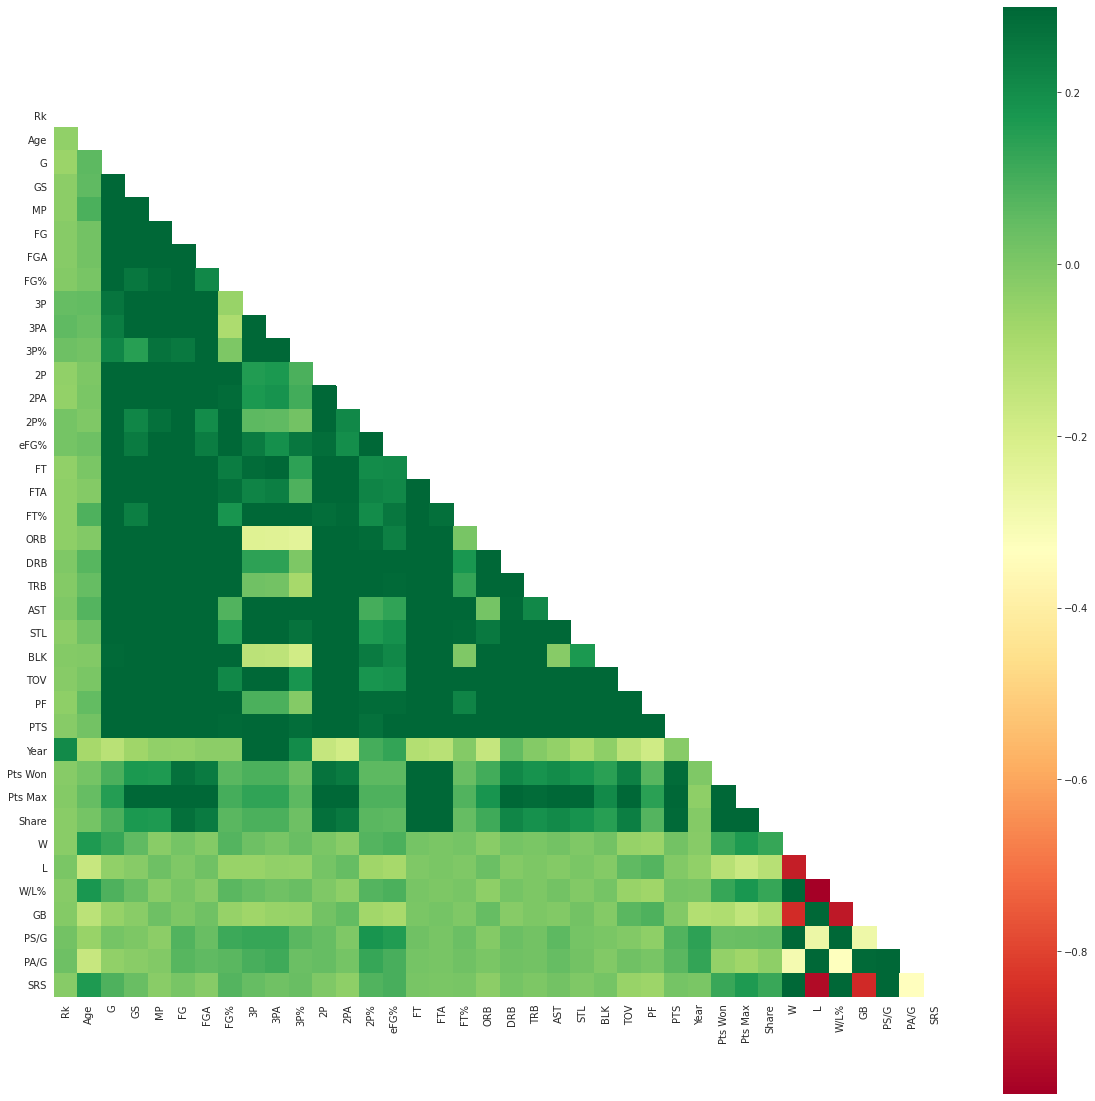

In [100]:
corr_matrix = raw_data.corr()

# plot heat map
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 20))
    ax = sns.heatmap(corr_matrix, mask=mask, vmax=.3, square=True,cmap="RdYlGn")

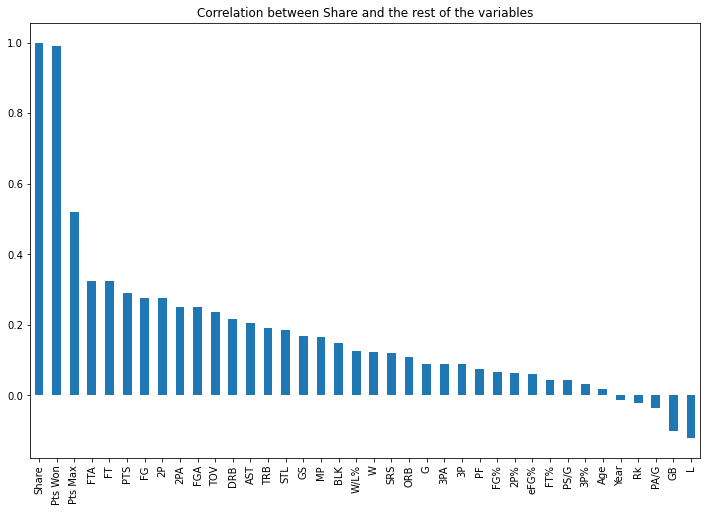

In [101]:
share_correlation = raw_data.corr()['Share'].sort_values(ascending=False)

plt.figure(figsize=(12,8))
share_correlation.plot.bar()
plt.title('Correlation between Share and the rest of the variables')
plt.show()

In [102]:
share_r = share_correlation.index
share_r

Index(['Share', 'Pts Won', 'Pts Max', 'FTA', 'FT', 'PTS', 'FG', '2P', '2PA', 'FGA', 'TOV', 'DRB', 'AST', 'TRB', 'STL', 'GS', 'MP', 'BLK', 'W/L%', 'W', 'SRS', 'ORB', 'G', '3PA', '3P', 'PF', 'FG%', '2P%', 'eFG%', 'FT%', 'PS/G', '3P%', 'Age', 'Year', 'Rk', 'PA/G', 'GB', 'L'], dtype='object')

## 4. Splitting Data

In [103]:
# remove non numeric columns and the dependent variable (share which is also pts won/pts max so get rid of all three)
predictors = ['Age','G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year',
       'W', 'L', 'W/L%', 'GB', 'PS/G',
       'PA/G', 'SRS']

In [104]:
# splitting data
train = fullstats[fullstats['Year'] != 2022]
test = fullstats[fullstats['Year'] == 2022]

## 5. Regression

In [105]:
from sklearn.linear_model import Ridge # Ridge is a form of linear regression that is designed to prevent overfitting

In [106]:
# fit the regression model on the training data
reg = Ridge(alpha=0.1)
reg.fit(train[predictors], train['Share']) # use predictors to predict share using train data

Ridge(alpha=0.1)

In [107]:
# predict the shares on the test data
predictions = reg.predict(test[predictors])

In [108]:
# put the predictions into a data frame to easily visualise
predictions = pd.DataFrame(predictions, columns=['Predictions'], index = test.index)

In [109]:
predictions

,Predictions
715,0.010676
716,-0.030889
717,-0.006246
718,0.018155
719,-0.006501
...,...
15389,-0.018626
15390,-0.010152
15391,0.005661
15392,0.002160


In [110]:
# combine predictions and actual data to compare
combination = pd.concat([test[['Player', 'Share']], predictions], axis=1)

In [111]:
# predictions
combination.sort_values('Predictions', ascending=False).reset_index(drop=True).head(12)

,Player,Share,Predictions
0,Giannis Antetokounmpo,0.595,0.223726
1,Nikola Jokić,0.875,0.201753
2,Joel Embiid,0.706,0.198790
3,LeBron James,0.001,0.161519
4,Luka Dončić,0.146,0.161214
5,Kevin Durant,0.001,0.147500
6,Ja Morant,0.010,0.119151
7,Trae Young,0.000,0.114055
8,James Harden,0.000,0.113408
9,Anthony Davis,0.000,0.107192


In [112]:
# actual rankings of the year 2022
mvp[mvp['Year'] == 2022]

,Player,Year,Pts Won,Pts Max,Share
685,Nikola Jokić,2022,875.0,1000,0.875
686,Joel Embiid,2022,706.0,1000,0.706
687,Giannis Antetokounmpo,2022,595.0,1000,0.595
688,Devin Booker,2022,216.0,1000,0.216
689,Luka Dončić,2022,146.0,1000,0.146
690,Jayson Tatum,2022,43.0,1000,0.043
691,Ja Morant,2022,10.0,1000,0.010
692,Stephen Curry,2022,4.0,1000,0.004
693,Chris Paul,2022,2.0,1000,0.002
694,DeMar DeRozan,2022,1.0,1000,0.001


In [113]:
# identifying error metric
from sklearn.metrics import mean_squared_error

In [114]:
mean_squared_error(combination['Share'], combination['Predictions'])

0.002248849389946807

In [115]:
combination['Share'].value_counts()

0.000    593
0.001      3
0.146      1
0.043      1
0.002      1
0.216      1
0.004      1
0.010      1
0.595      1
0.706      1
0.875      1
Name: Share, dtype: int64

In [116]:
combination = combination.sort_values('Share', ascending=False)
combination['Rk'] = list(range(1,combination.shape[0]+1))

In [117]:
combination

,Player,Share,Predictions,Rk
730,Nikola Jokić,0.875,0.201753,1
904,Joel Embiid,0.706,0.198790,2
14472,Giannis Antetokounmpo,0.595,0.223726,3
974,Devin Booker,0.216,0.092672,4
14263,Luka Dončić,0.146,0.161214,5
...,...,...,...,...
4539,Nikola Vučević,0.000,0.055523,601
4540,Patrick Williams,0.000,-0.020047,602
4541,Tony Bradley,0.000,-0.010217,603
4542,Tristan Thompson,0.000,-0.009239,604


In [118]:
combination = combination.sort_values('Predictions', ascending=False)
combination['Predicted_Rk'] = list(range(1,combination.shape[0]+1))

In [119]:
combination

,Player,Share,Predictions,Rk,Predicted_Rk
14472,Giannis Antetokounmpo,0.595,0.223726,3,1
730,Nikola Jokić,0.875,0.201753,1,2
904,Joel Embiid,0.706,0.198790,2,3
9677,LeBron James,0.001,0.161519,10,4
14263,Luka Dončić,0.146,0.161214,5,5
...,...,...,...,...,...
15393,Trayvon Palmer,0.000,-0.059766,605,601
15376,Derrick Walton,0.000,-0.066765,215,602
1283,Zavier Simpson,0.000,-0.067509,318,603
14615,Wes Iwundu,0.000,-0.069613,288,604


In [120]:
# look at a metric out of the top 5 predicted, how many have been predicted correctly
combination.sort_values('Share', ascending=False)

,Player,Share,Predictions,Rk,Predicted_Rk
730,Nikola Jokić,0.875,0.201753,1,2
904,Joel Embiid,0.706,0.198790,2,3
14472,Giannis Antetokounmpo,0.595,0.223726,3,1
974,Devin Booker,0.216,0.092672,4,18
14263,Luka Dončić,0.146,0.161214,5,5
...,...,...,...,...,...
14603,Gorgui Dieng,0.000,0.006977,297,209
14264,Marquese Chriss,0.000,0.006758,261,210
9760,Joel Ayayi,0.000,0.006148,139,211
15180,Tre Scott,0.000,0.006101,226,212


In [121]:
# error metric - average precision: the percentage of how good it was in finding top 5 mvp players correctly
def find_ap(df):
    actual = df.sort_values('Share', ascending=False).head(5)
    predicted = df.sort_values('Predictions', ascending=False)
    ps = []
    found = 0
    seen = 1
    for index, row in predicted.iterrows():
        if row['Player'] in actual['Player'].values:
            found += 1
            ps.append(found/seen)
        seen += 1
    return sum(ps)/len(ps)

In [122]:
find_ap(combination)

0.8155555555555555

In [123]:
years = list(range(1986,2023))

In [124]:
# back testing 
aps = [] # average precision
all_predictions = []
for year in years[5:]:
    train = fullstats[fullstats['Year'] < year]
    test = fullstats[fullstats['Year'] == year]
    
    reg.fit(train[predictors], train['Share'])
    predictions = reg.predict(test[predictors])
    predictions = pd.DataFrame(predictions, columns=['Predictions'], index = test.index)
    combination = pd.concat([test[['Player', 'Share']], predictions], axis=1)
    all_predictions.append(combination)
    aps.append(find_ap(combination))

In [125]:
years[5]

1991

Training set is 1986 to 1990 and test set is 1991

In [126]:
sum(aps)/len(aps)

0.7700672085437711

In [127]:
def add_ranks(combination):
    combination = combination.sort_values('Share', ascending=False)
    combination['Rk'] = list(range(1,combination.shape[0]+1))
    
    combination = combination.sort_values('Predictions', ascending=False)
    combination['Predicted_Rk'] = list(range(1,combination.shape[0]+1))
    
    combination['Diff'] = combination['Rk'] - combination['Predicted_Rk']
    
    return combination

In [128]:
# year 1991 predictions
ranking_1991 = add_ranks(all_predictions[1])
ranking_1991[ranking_1991['Rk'] < 6].sort_values('Diff', ascending=False)

,Player,Share,Predictions,Rk,Predicted_Rk,Diff
10613,David Robinson,0.351,0.163999,3,2,1
13858,Karl Malone,0.273,0.154684,4,3,1
12158,Michael Jordan,0.938,0.189649,1,1,0
10078,Patrick Ewing,0.104,0.108445,5,10,-5
3576,Clyde Drexler,0.584,0.124902,2,8,-6


In [129]:
def backtest(fullstats, model, year, predictors):
    # back testing 
    aps = [] # average precision
    all_predictions = []
    for year in years[5:]:
        train = fullstats[fullstats['Year'] < year]
        test = fullstats[fullstats['Year'] == year]

        model.fit(train[predictors], train['Share'])
        predictions = reg.predict(test[predictors])
        predictions = pd.DataFrame(predictions, columns=['Predictions'], index = test.index)
        combination = pd.concat([test[['Player', 'Share']], predictions], axis=1)
        combination = add_ranks(combination)
        all_predictions.append(combination)
        aps.append(find_ap(combination))
        
    return sum(aps)/len(aps), aps, pd.concat(all_predictions)

In [130]:
mean_ap, aps, all_predictions = backtest(fullstats, reg, years[5:], predictors)

In [131]:
mean_ap

0.7700672085437711

In [132]:
# the highest wrong predictions
all_predictions[all_predictions['Rk'] < 5].sort_values('Diff').head(10)

,Player,Share,Predictions,Rk,Predicted_Rk,Diff
6650,Steve Nash,0.839,0.045462,1,35,-34
6668,Steve Nash,0.739,0.065858,1,28,-27
1401,Jason Kidd,0.712,0.048282,2,27,-25
16471,Joakim Noah,0.258,0.053049,4,26,-22
10378,Peja Stojaković,0.228,0.047773,4,24,-20
974,Devin Booker,0.216,0.092672,4,18,-14
6683,Steve Nash,0.785,0.083733,2,15,-13
5836,Tim Hardaway,0.207,0.074766,4,15,-11
8353,Kobe Bryant,0.291,0.079870,4,15,-11
1066,Allen Iverson,0.270,0.067286,4,14,-10


In [133]:
# shows which variables the model thinks are the most important values to get highest mvp share
pd.concat([pd.Series(reg.coef_), pd.Series(predictors)], axis=1).sort_values(0, ascending=False)

,0,1
13,0.082642,eFG%
10,0.027122,2P
18,0.025295,DRB
29,0.023730,W/L%
21,0.013924,STL
17,0.012449,ORB
22,0.010838,BLK
7,0.010488,3P
25,0.008387,PTS
20,0.007854,AST


In [134]:
# add more predictors: comparing these specific stats to the mean value of each
stats_ratios = fullstats[['PTS', 'AST', 'BLK', '3P', 'Year']].groupby('Year').apply(lambda x: x/x.mean())

In [135]:
stats_ratios

,PTS,AST,BLK,3P,Year
0,0.674727,0.313068,1.341719,0.000000,1.0
1,1.623563,0.983927,0.447240,3.840000,1.0
2,2.108523,1.207547,2.236198,0.000000,1.0
3,0.421705,0.000000,0.000000,0.000000,1.0
4,2.466972,1.565339,3.577918,0.000000,1.0
...,...,...,...,...,...
18225,0.735752,0.819562,1.528302,0.650951,1.0
18226,0.071202,0.000000,0.000000,0.130190,1.0
18227,1.281633,0.601012,2.547170,0.520761,1.0
18228,0.474679,0.218550,1.273585,0.650951,1.0


In [136]:
# add the stats_ratio table to the df#
fullstats[['PTS_R', 'AST_R', 'STL_R', 'BLK_R', '3P_R']] = stats_ratios[['PTS', 'AST', 'BLK', '3P', 'Year']]

C:\Users\Abdulkadir\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [137]:
fullstats.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,CONFERENCE,PTS_R,AST_R,STL_R,BLK_R,3P_R
0,98.0,A.C. Green,PF,22.0,LAL,82.0,1.0,18.8,2.5,4.7,0.539,0.0,0.1,0.167,2.5,4.7,0.545,0.540,1.2,2.0,0.611,2.0,2.7,4.6,0.7,0.6,0.6,1.2,2.8,6.4,1986,0.0,0.0,0.000,Los Angeles Lakers,62.0,20.0,0.756,0.0,117.3,109.5,6.84,West,0.674727,0.313068,1.341719,0.00,1.0
1,244.0,Byron Scott,SG,24.0,LAL,76.0,62.0,28.8,6.7,13.0,0.513,0.3,0.8,0.361,6.4,12.2,0.523,0.524,1.8,2.3,0.784,0.7,1.8,2.5,2.2,1.1,0.2,1.4,2.2,15.4,1986,0.0,0.0,0.000,Los Angeles Lakers,62.0,20.0,0.756,0.0,117.3,109.5,6.84,West,1.623563,0.983927,0.447240,3.84,1.0
2,323.0,James Worthy,SF,24.0,LAL,75.0,73.0,32.7,8.4,14.5,0.579,0.0,0.2,0.000,8.4,14.3,0.586,0.579,3.2,4.2,0.771,1.8,3.3,5.2,2.7,1.1,1.0,2.0,2.6,20.0,1986,7.0,780.0,0.009,Los Angeles Lakers,62.0,20.0,0.756,0.0,117.3,109.5,6.84,West,2.108523,1.207547,2.236198,0.00,1.0
3,114.0,Jerome Henderson,C,26.0,LAL,1.0,0.0,3.0,2.0,3.0,0.667,0.0,0.0,0.000,2.0,3.0,0.667,0.667,0.0,0.0,0.000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,1986,0.0,0.0,0.000,Los Angeles Lakers,62.0,20.0,0.756,0.0,117.3,109.5,6.84,West,0.421705,0.000000,0.000000,0.00,1.0
4,1.0,Kareem Abdul-Jabbar,C,38.0,LAL,79.0,79.0,33.3,9.6,16.9,0.564,0.0,0.0,0.000,9.6,16.9,0.565,0.564,4.3,5.6,0.765,1.7,4.4,6.1,3.5,0.8,1.6,2.6,3.1,23.4,1986,135.0,780.0,0.173,Los Angeles Lakers,62.0,20.0,0.756,0.0,117.3,109.5,6.84,West,2.466972,1.565339,3.577918,0.00,1.0


In [138]:
# add new predictors to the predictors list
predictors += ['PTS_R', 'AST_R', 'STL_R', 'BLK_R', '3P_R']

In [139]:
mean_ap, aps, all_predictions = backtest(fullstats, reg, years[5:], predictors)

In [140]:
mean_ap

0.767652994237141

Improved slightly

In [141]:
fullstats['Pos'].unique()

array(['PF', 'SG', 'SF', 'C', 'PG', 'PG-SG', 'PF-SF', 'SG-PG', 'PF-C',
       'SG-SF', 'SF-PF', 'SF-SG', 'C-PF', 'SG-PF', 'PG-SF', 'SF-C'],
      dtype=object)

In [142]:
# turns the category into numbers
fullstats['NPos'] = fullstats['Pos'].astype('category').cat.codes

<ipython-input-142-8b4bf1bf12a8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fullstats['NPos'] = fullstats['Pos'].astype('category').cat.codes


In [143]:
fullstats

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,CONFERENCE,PTS_R,AST_R,STL_R,BLK_R,3P_R,NPos
0,98.0,A.C. Green,PF,22.0,LAL,82.0,1.0,18.8,2.5,4.7,0.539,0.0,0.1,0.167,2.5,4.7,0.545,0.540,1.2,2.0,0.611,2.0,2.7,4.6,0.7,0.6,0.6,1.2,2.8,6.4,1986,0.0,0.0,0.000,Los Angeles Lakers,62.0,20.0,0.756,0.0,117.3,109.5,6.84,West,0.674727,0.313068,1.341719,0.000000,1.0,2
1,244.0,Byron Scott,SG,24.0,LAL,76.0,62.0,28.8,6.7,13.0,0.513,0.3,0.8,0.361,6.4,12.2,0.523,0.524,1.8,2.3,0.784,0.7,1.8,2.5,2.2,1.1,0.2,1.4,2.2,15.4,1986,0.0,0.0,0.000,Los Angeles Lakers,62.0,20.0,0.756,0.0,117.3,109.5,6.84,West,1.623563,0.983927,0.447240,3.840000,1.0,12
2,323.0,James Worthy,SF,24.0,LAL,75.0,73.0,32.7,8.4,14.5,0.579,0.0,0.2,0.000,8.4,14.3,0.586,0.579,3.2,4.2,0.771,1.8,3.3,5.2,2.7,1.1,1.0,2.0,2.6,20.0,1986,7.0,780.0,0.009,Los Angeles Lakers,62.0,20.0,0.756,0.0,117.3,109.5,6.84,West,2.108523,1.207547,2.236198,0.000000,1.0,8
3,114.0,Jerome Henderson,C,26.0,LAL,1.0,0.0,3.0,2.0,3.0,0.667,0.0,0.0,0.000,2.0,3.0,0.667,0.667,0.0,0.0,0.000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,1986,0.0,0.0,0.000,Los Angeles Lakers,62.0,20.0,0.756,0.0,117.3,109.5,6.84,West,0.421705,0.000000,0.000000,0.000000,1.0,0
4,1.0,Kareem Abdul-Jabbar,C,38.0,LAL,79.0,79.0,33.3,9.6,16.9,0.564,0.0,0.0,0.000,9.6,16.9,0.565,0.564,4.3,5.6,0.765,1.7,4.4,6.1,3.5,0.8,1.6,2.6,3.1,23.4,1986,135.0,780.0,0.173,Los Angeles Lakers,62.0,20.0,0.756,0.0,117.3,109.5,6.84,West,2.466972,1.565339,3.577918,0.000000,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18225,185.0,Spencer Hawes,PF,28.0,MIL,54.0,1.0,14.8,2.5,5.1,0.484,0.5,1.5,0.309,2.0,3.6,0.556,0.529,0.8,1.0,0.846,0.7,2.8,3.5,1.5,0.3,0.6,0.9,1.4,6.2,2017,0.0,0.0,0.000,Milwaukee Bucks,42.0,40.0,0.512,9.0,103.6,103.8,-0.45,East,0.735752,0.819562,1.528302,0.650951,1.0,2
18226,331.0,Steve Novak,PF,33.0,MIL,8.0,0.0,2.8,0.3,0.9,0.286,0.1,0.8,0.167,0.1,0.1,1.000,0.357,0.0,0.0,0.000,0.0,0.4,0.4,0.0,0.0,0.0,0.0,0.1,0.6,2017,0.0,0.0,0.000,Milwaukee Bucks,42.0,40.0,0.512,9.0,103.6,103.8,-0.45,East,0.071202,0.000000,0.000000,0.130190,1.0,2
18227,239.0,Terrence Jones,PF,25.0,MIL,54.0,12.0,23.5,4.3,9.1,0.470,0.4,1.4,0.253,3.9,7.7,0.508,0.489,1.9,3.1,0.606,1.2,4.5,5.7,1.1,0.7,1.0,0.9,1.2,10.8,2017,0.0,0.0,0.000,Milwaukee Bucks,42.0,40.0,0.512,9.0,103.6,103.8,-0.45,East,1.281633,0.601012,2.547170,0.520761,1.0,2
18228,281.0,Thon Maker,C,19.0,MIL,57.0,34.0,9.9,1.5,3.2,0.459,0.5,1.3,0.378,1.0,1.9,0.514,0.536,0.6,0.9,0.653,0.7,1.3,2.0,0.4,0.2,0.5,0.3,1.5,4.0,2017,0.0,0.0,0.000,Milwaukee Bucks,42.0,40.0,0.512,9.0,103.6,103.8,-0.45,East,0.474679,0.218550,1.273585,0.650951,1.0,0


In [144]:
# apply numerical to team
fullstats['NTm'] = fullstats['Tm'].astype('category').cat.codes

<ipython-input-144-bb81b1092776>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fullstats['NTm'] = fullstats['Tm'].astype('category').cat.codes


In [145]:
fullstats

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,CONFERENCE,PTS_R,AST_R,STL_R,BLK_R,3P_R,NPos,NTm
0,98.0,A.C. Green,PF,22.0,LAL,82.0,1.0,18.8,2.5,4.7,0.539,0.0,0.1,0.167,2.5,4.7,0.545,0.540,1.2,2.0,0.611,2.0,2.7,4.6,0.7,0.6,0.6,1.2,2.8,6.4,1986,0.0,0.0,0.000,Los Angeles Lakers,62.0,20.0,0.756,0.0,117.3,109.5,6.84,West,0.674727,0.313068,1.341719,0.000000,1.0,2,15
1,244.0,Byron Scott,SG,24.0,LAL,76.0,62.0,28.8,6.7,13.0,0.513,0.3,0.8,0.361,6.4,12.2,0.523,0.524,1.8,2.3,0.784,0.7,1.8,2.5,2.2,1.1,0.2,1.4,2.2,15.4,1986,0.0,0.0,0.000,Los Angeles Lakers,62.0,20.0,0.756,0.0,117.3,109.5,6.84,West,1.623563,0.983927,0.447240,3.840000,1.0,12,15
2,323.0,James Worthy,SF,24.0,LAL,75.0,73.0,32.7,8.4,14.5,0.579,0.0,0.2,0.000,8.4,14.3,0.586,0.579,3.2,4.2,0.771,1.8,3.3,5.2,2.7,1.1,1.0,2.0,2.6,20.0,1986,7.0,780.0,0.009,Los Angeles Lakers,62.0,20.0,0.756,0.0,117.3,109.5,6.84,West,2.108523,1.207547,2.236198,0.000000,1.0,8,15
3,114.0,Jerome Henderson,C,26.0,LAL,1.0,0.0,3.0,2.0,3.0,0.667,0.0,0.0,0.000,2.0,3.0,0.667,0.667,0.0,0.0,0.000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,1986,0.0,0.0,0.000,Los Angeles Lakers,62.0,20.0,0.756,0.0,117.3,109.5,6.84,West,0.421705,0.000000,0.000000,0.000000,1.0,0,15
4,1.0,Kareem Abdul-Jabbar,C,38.0,LAL,79.0,79.0,33.3,9.6,16.9,0.564,0.0,0.0,0.000,9.6,16.9,0.565,0.564,4.3,5.6,0.765,1.7,4.4,6.1,3.5,0.8,1.6,2.6,3.1,23.4,1986,135.0,780.0,0.173,Los Angeles Lakers,62.0,20.0,0.756,0.0,117.3,109.5,6.84,West,2.466972,1.565339,3.577918,0.000000,1.0,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18225,185.0,Spencer Hawes,PF,28.0,MIL,54.0,1.0,14.8,2.5,5.1,0.484,0.5,1.5,0.309,2.0,3.6,0.556,0.529,0.8,1.0,0.846,0.7,2.8,3.5,1.5,0.3,0.6,0.9,1.4,6.2,2017,0.0,0.0,0.000,Milwaukee Bucks,42.0,40.0,0.512,9.0,103.6,103.8,-0.45,East,0.735752,0.819562,1.528302,0.650951,1.0,2,18
18226,331.0,Steve Novak,PF,33.0,MIL,8.0,0.0,2.8,0.3,0.9,0.286,0.1,0.8,0.167,0.1,0.1,1.000,0.357,0.0,0.0,0.000,0.0,0.4,0.4,0.0,0.0,0.0,0.0,0.1,0.6,2017,0.0,0.0,0.000,Milwaukee Bucks,42.0,40.0,0.512,9.0,103.6,103.8,-0.45,East,0.071202,0.000000,0.000000,0.130190,1.0,2,18
18227,239.0,Terrence Jones,PF,25.0,MIL,54.0,12.0,23.5,4.3,9.1,0.470,0.4,1.4,0.253,3.9,7.7,0.508,0.489,1.9,3.1,0.606,1.2,4.5,5.7,1.1,0.7,1.0,0.9,1.2,10.8,2017,0.0,0.0,0.000,Milwaukee Bucks,42.0,40.0,0.512,9.0,103.6,103.8,-0.45,East,1.281633,0.601012,2.547170,0.520761,1.0,2,18
18228,281.0,Thon Maker,C,19.0,MIL,57.0,34.0,9.9,1.5,3.2,0.459,0.5,1.3,0.378,1.0,1.9,0.514,0.536,0.6,0.9,0.653,0.7,1.3,2.0,0.4,0.2,0.5,0.3,1.5,4.0,2017,0.0,0.0,0.000,Milwaukee Bucks,42.0,40.0,0.512,9.0,103.6,103.8,-0.45,East,0.474679,0.218550,1.273585,0.650951,1.0,0,18


In [146]:
fullstats['NTm'].value_counts()

14    597
27    590
7     588
11    582
8     578
0     576
18    576
12    573
31    573
9     569
1     569
24    563
13    563
15    563
5     561
28    558
10    556
30    555
29    552
34    550
17    539
26    509
19    495
33    441
20    421
36    410
16    353
32    329
25    240
4     209
2     182
37    177
23    163
3     157
21    143
6     130
35     88
22     32
Name: NTm, dtype: int64

In [147]:
fullstats[fullstats['NTm'] == 14]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,CONFERENCE,PTS_R,AST_R,STL_R,BLK_R,3P_R,NPos,NTm
1472,439.0,Aaron Williams,PF,35.0,LAC,38.0,7.0,9.8,0.8,1.4,0.547,0.0,0.0,0.000,0.8,1.4,0.558,0.547,0.5,0.6,0.818,0.7,1.5,2.2,0.2,0.2,0.4,0.5,1.5,2.0,2007,0.0,0.0,0.0,Los Angeles Clippers,40.0,42.0,0.488,21.0,95.6,96.1,-0.07,West,0.243643,0.113240,1.024609,0.000000,1.0,2,14
1473,440.0,Alvin Williams,PG,32.0,LAC,2.0,0.0,5.0,0.0,1.0,0.000,0.0,0.5,0.000,0.0,0.5,0.000,0.000,1.0,2.0,0.500,0.5,0.0,0.5,1.5,1.0,0.0,1.5,0.0,1.0,2007,0.0,0.0,0.0,Los Angeles Clippers,40.0,42.0,0.488,21.0,95.6,96.1,-0.07,West,0.121821,0.849302,0.000000,0.000000,1.0,5,14
1474,230.0,Chris Kaman,C,24.0,LAC,75.0,66.0,29.0,3.9,8.7,0.451,0.0,0.0,0.000,3.9,8.7,0.452,0.451,2.2,3.0,0.741,2.1,5.7,7.8,1.1,0.5,1.5,2.0,3.3,10.1,2007,0.0,0.0,0.0,Los Angeles Clippers,40.0,42.0,0.488,21.0,95.6,96.1,-0.07,West,1.230397,0.622821,3.842282,0.000000,1.0,0,14
1475,251.0,Corey Maggette,SF,27.0,LAC,75.0,31.0,30.5,4.9,10.8,0.454,0.2,0.9,0.200,4.7,9.9,0.476,0.462,6.9,8.4,0.820,1.2,4.7,5.9,2.8,0.9,0.2,2.7,3.3,16.9,2007,0.0,0.0,0.0,Los Angeles Clippers,40.0,42.0,0.488,21.0,95.6,96.1,-0.07,West,2.058783,1.585363,0.512304,0.399303,1.0,8,14
1476,284.0,Cuttino Mobley,SG,31.0,LAC,78.0,73.0,36.4,5.0,11.3,0.440,1.3,3.2,0.411,3.7,8.2,0.451,0.497,2.6,3.1,0.837,0.7,2.8,3.4,2.5,1.2,0.3,1.9,2.4,13.8,2007,0.0,0.0,0.0,Los Angeles Clippers,40.0,42.0,0.488,21.0,95.6,96.1,-0.07,West,1.681136,1.415503,0.768456,2.595466,1.0,12,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17722,354.0,Loy Vaught,PF,24.0,LAC,79.0,4.0,20.9,4.0,7.8,0.508,0.0,0.1,0.250,3.9,7.7,0.510,0.509,1.5,2.0,0.748,2.1,4.2,6.2,0.7,0.7,0.5,1.1,2.2,9.4,1993,0.0,0.0,0.0,Los Angeles Clippers,41.0,41.0,0.500,21.0,107.1,106.8,0.33,West,1.051997,0.336663,1.127820,0.000000,1.0,2,14
17723,166.0,Mark Jackson,PG,27.0,LAC,82.0,81.0,38.0,5.6,11.5,0.486,0.3,1.0,0.268,5.3,10.5,0.506,0.497,2.9,3.7,0.803,1.6,3.2,4.7,8.8,1.7,0.1,2.7,1.9,14.4,1993,0.0,0.0,0.0,Los Angeles Clippers,41.0,41.0,0.500,21.0,107.1,106.8,0.33,West,1.611570,4.232334,0.225564,1.209928,1.0,5,14
17724,386.0,Randy Woods,PG,22.0,LAC,41.0,1.0,4.2,0.6,1.6,0.348,0.1,0.3,0.214,0.5,1.3,0.385,0.371,0.5,0.6,0.731,0.1,0.2,0.3,1.0,0.3,0.0,0.4,0.6,1.7,1993,0.0,0.0,0.0,Los Angeles Clippers,41.0,41.0,0.500,21.0,107.1,106.8,0.33,West,0.190255,0.480947,0.000000,0.403309,1.0,5,14
17725,146.0,Ron Harper,SG,29.0,LAC,80.0,77.0,37.1,6.8,15.0,0.451,0.7,2.3,0.280,6.1,12.7,0.482,0.472,3.8,5.0,0.769,1.5,3.9,5.3,4.5,2.2,0.9,2.8,2.7,18.0,1993,0.0,0.0,0.0,Los Angeles Clippers,41.0,41.0,0.500,21.0,107.1,106.8,0.33,West,2.014463,2.164262,2.030075,2.823164,1.0,12,14


Use random forest to find categorical team relationship

## 6. Random Forest

In [148]:
from sklearn.ensemble import RandomForestRegressor

In [149]:
# random forest
rf = RandomForestRegressor(n_estimators=50, random_state=1, min_samples_split=5)
mean_ap_rf, aps, all_predictions = backtest(fullstats, rf, years[32:], predictors) # year 2018 onwards

In [150]:
# accuracy of random forest
mean_ap_rf

0.7869060055343186

In [151]:
# regression
mean_ap_reg, aps, all_predictions = backtest(fullstats, reg, years[32:], predictors)

In [152]:
# accuracy of regression
mean_ap_reg

0.767652994237141

Random forest more accurate than the linear model